In [4]:
import matplotlib.pyplot as plt
import torch

iran: nodes 414836 (2311.0 T, 412525.0 U), edges 6176167
russia: nodes 234311 (416.0 T, 233895.0 U), edges 2045929
venezuela: nodes 382993 (1951.0 T, 381042.0 U), edges 6940056
uae: nodes 106008 (4248.0 T, 101760.0 U), edges 1056371
china: nodes 375986 (940.0 T, 375046.0 U), edges 3528516


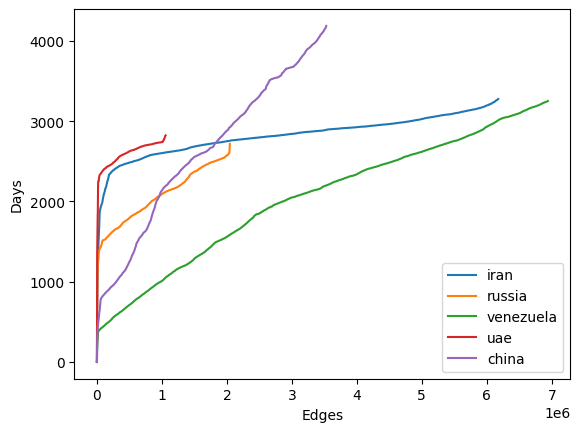

In [19]:
gs = [
    ('jan2019_iran', 2), # Done
    ('jan2019_russia', 2), # Done
    ('jan2019_venezuela', 2), # OOM
    ('sept2019_uae', 2), # Done
    ('aug2019_china', 2) ## OOM]
]

for name,_ in gs:
    g = torch.load(f'graphs/{name}.pt', weights_only=False)
    ts = g.ts - g.ts.min()
    ts = ts / (60*60*24)
    name = name.split('_')[1]
    feats = g.labels.sum(dim=0)

    plt.plot(torch.arange(ts.size(0)), ts, label=name)
    plt.ylabel("Days")
    plt.xlabel("Edges")

    print(f"{name}: nodes {g.x.size(0)} ({feats[0].item()} T, {feats[1].item()} U), edges {g.edge_index.size(1)}")

plt.legend(loc="lower right")
plt.show()